In [1]:
!pip install -q transformers datasets


In [2]:
!pip install tf-keras

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.10) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSeq

Epoch 1/2


150/150 [==============================] - 624s 4s/step - loss: 0.4219 - accuracy: 0.8075 - val_loss: 0.3195 - val_accuracy: 0.8667
Epoch 2/2
38/38 [==============================] - 22s 489ms/step

Classification Report:

               precision    recall  f1-score   support

Not Sarcastic       0.86      0.94      0.90       338
    Sarcastic       0.92      0.81      0.86       262

     accuracy                           0.88       600
    macro avg       0.89      0.87      0.88       600
 weighted avg       0.89      0.88      0.88       600



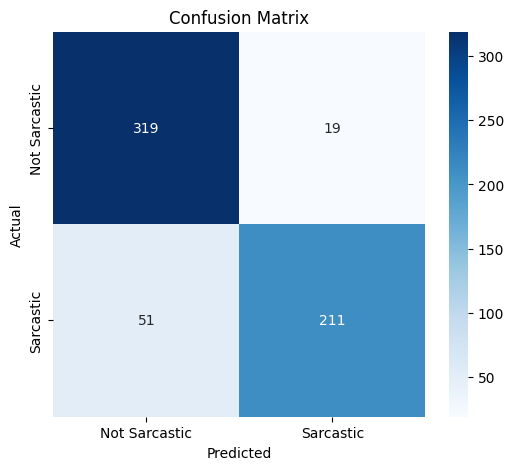

In [ ]:
# 1. Install & Import Libraries
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 2. Load Data
with open(r"C:\Users\user\Desktop\Research\Research_Project\Sarcasm_Headlines_Dataset.json", "r") as f:
    data = [json.loads(line) for line in f]

texts = [item['headline'] for item in data]
labels = [item['is_sarcastic'] for item in data]

# ✅ Reduce data size for faster training
texts = texts[:3000]
labels = labels[:3000]

# 3. Train/Test Split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# 4. Tokenize using DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=64)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=64)

# 5. Convert to tf.data.Dataset
def to_dataset(encodings, labels):
    return tf.data.Dataset.from_tensor_slices((
        {
            'input_ids': tf.constant(encodings['input_ids']),
            'attention_mask': tf.constant(encodings['attention_mask'])
        },
        tf.constant(labels)
    ))

batch_size = 16
train_dataset = to_dataset(train_encodings, train_labels).shuffle(1000).batch(batch_size)
test_dataset = to_dataset(test_encodings, test_labels).batch(batch_size)

# 6. Load DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2, from_pt=True)

# 7. Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

# 8. Train
history = model.fit(train_dataset, validation_data=test_dataset, epochs=2)

# 9. Evaluate
preds = model.predict(test_dataset).logits
y_pred = tf.argmax(preds, axis=1).numpy()
y_true = np.array(test_labels)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Not Sarcastic", "Sarcastic"]))

# 10. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Sarcastic", "Sarcastic"], yticklabels=["Not Sarcastic", "Sarcastic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'cla

Epoch 1/2
150/150 [==============================] - 586s 4s/step - loss: 0.4235 - accuracy: 0.8092 - val_loss: 0.2845 - val_accuracy: 0.8817
Epoch 2/2
38/38 [==============================] - 24s 558ms/step

Classification Report:

               precision    recall  f1-score   support

Not Sarcastic       0.95      0.89      0.92       338
    Sarcastic       0.87      0.94      0.90       262

     accuracy                           0.91       600
    macro avg       0.91      0.92      0.91       600
 weighted avg       0.91      0.91      0.91       600



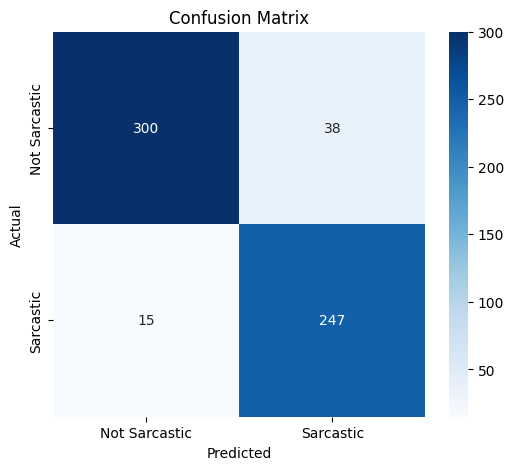

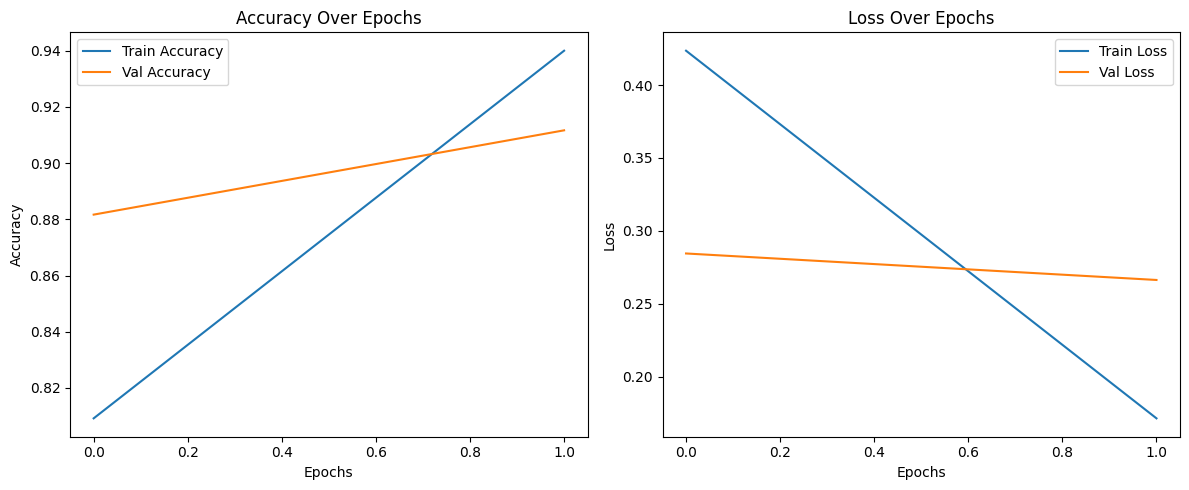

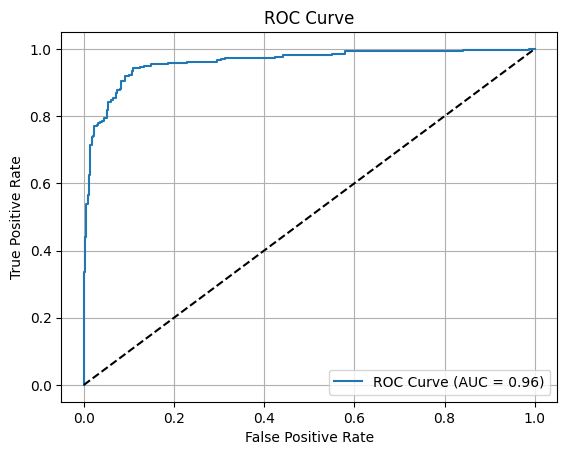

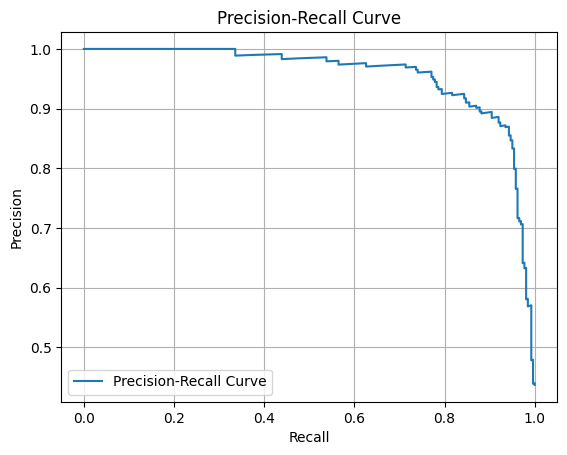

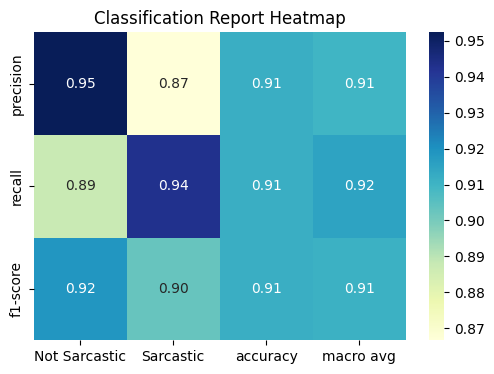

Model and tokenizer saved to C:\Users\user\Desktop\Research\Research_Project\distilbert_sarcasm_model


In [4]:
# 1. Install & Import Libraries
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns
import pandas as pd

# 2. Load Data
with open(r"C:\Users\user\Desktop\Research\Research_Project\Sarcasm_Headlines_Dataset.json", "r") as f:
    data = [json.loads(line) for line in f]

texts = [item['headline'] for item in data]
labels = [item['is_sarcastic'] for item in data]

# ✅ Reduce data size for faster training
texts = texts[:3000]
labels = labels[:3000]

# 3. Train/Test Split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# 4. Tokenize using DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=64)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=64)

# 5. Convert to tf.data.Dataset
def to_dataset(encodings, labels):
    return tf.data.Dataset.from_tensor_slices((
        {
            'input_ids': tf.constant(encodings['input_ids']),
            'attention_mask': tf.constant(encodings['attention_mask'])
        },
        tf.constant(labels)
    ))

batch_size = 16
train_dataset = to_dataset(train_encodings, train_labels).shuffle(1000).batch(batch_size)
test_dataset = to_dataset(test_encodings, test_labels).batch(batch_size)

# 6. Load DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2, from_pt=True)

# 7. Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

# 8. Train
history = model.fit(train_dataset, validation_data=test_dataset, epochs=2)

# 9. Evaluate
preds = model.predict(test_dataset).logits
y_pred = tf.argmax(preds, axis=1).numpy()
y_true = np.array(test_labels)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Not Sarcastic", "Sarcastic"]))

# 10. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Sarcastic", "Sarcastic"], yticklabels=["Not Sarcastic", "Sarcastic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 11. Accuracy and Loss Over Epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# 12. ROC Curve
y_probs = tf.nn.softmax(preds, axis=1)[:, 1].numpy()
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 13. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_probs)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

# 14. Classification Report Heatmap
report = classification_report(y_true, y_pred, target_names=["Not Sarcastic", "Sarcastic"], output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :-1]  # Exclude support row

plt.figure(figsize=(6, 4))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

# 15. Save the trained DistilBERT model for future use
model.save_pretrained(r"C:\Users\user\Desktop\Research\Research_Project\distilbert_sarcasm_model")
tokenizer.save_pretrained(r"C:\Users\user\Desktop\Research\Research_Project\distilbert_sarcasm_model")
print(r"Model and tokenizer saved to C:\Users\user\Desktop\Research\Research_Project\distilbert_sarcasm_model")


In [ ]:
# Inference on new headlines not in the dataset
# This cell loads the saved model/tokenizer from the folder and provides simple functions
import os
try:
    from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
    import tensorflow as tf
except Exception as e:
    print('Transformers/TensorFlow not available:', e)
    raise

model_dir = r'C:\Users\user\Desktop\Research\Research_Project\distilbert_sarcasm_model'
if not os.path.isdir(model_dir):
    raise FileNotFoundError(f'Model directory not found: {model_dir}')

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained(model_dir)
model = TFDistilBertForSequenceClassification.from_pretrained(model_dir)

def predict_headline(headline: str):
    """Return label and confidence for a single headline."""
    inputs = tokenizer(headline, return_tensors='tf', truncation=True, padding=True, max_length=64)
    outputs = model(inputs)
    logits = outputs.logits
    probs = tf.nn.softmax(logits, axis=1).numpy()[0]
    pred = int(tf.argmax(logits, axis=1).numpy()[0])
    label = 'Sarcastic' if pred == 1 else 'Not Sarcastic'
    confidence = float(probs[pred])
    return label, confidence, {'not_sarcastic': float(probs[0]), 'sarcastic': float(probs[1])}

# Example usage:
examples = [
    'Local startup claims their app will disrupt the industry overnight',
    'Mayor announces new parks to help the city breathe',
    'CEO says customers are always right, except when they are not'
]
for ex in examples:
    lbl, conf, probs = predict_headline(ex)
    print(f'Headline: {ex}')
    print(f'Prediction: {lbl} (confidence {conf*100:.2f}%)')
    print('Probs:', probs)
    print('---')

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at C:\Users\user\Desktop\Research\Research_Project\distilbert_sarcasm_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Headline: Local startup claims their app will disrupt the industry overnight
Prediction: Sarcastic (confidence 66.29%)
Probs: {'not_sarcastic': 0.33708059787750244, 'sarcastic': 0.6629193425178528}
---
Headline: Mayor announces new parks to help the city breathe
Prediction: Sarcastic (confidence 95.92%)
Probs: {'not_sarcastic': 0.040825240314006805, 'sarcastic': 0.9591748118400574}
---
Headline: CEO says customers are always right, except when they are not
Prediction: Sarcastic (confidence 87.40%)
Probs: {'not_sarcastic': 0.12603002786636353, 'sarcastic': 0.8739700317382812}
---


In [3]:
# Batch inference helper: read CSV/JSONL, run predictions, and save results
import pandas as pd
from pathlib import Path

def predict_batch_from_file(path: str, headline_col: str = None, output_path: str = 'predictions_output.csv'):
    """Load a CSV or JSONL from `path`, run predict_headline on each row in the selected column, and write CSV with predictions."""
    p = Path(path)
    if not p.exists():
        raise FileNotFoundError(f'File not found: {path}')

    suffix = p.suffix.lower()
    if suffix == '.csv':
        df = pd.read_csv(p)
    else:
        # assume jsonl
        df = pd.read_json(p, lines=True)

    if headline_col is None:
        # try to find a sensible column name
        candidates = [c for c in df.columns if 'headline' in c.lower() or 'text' in c.lower() or 'title' in c.lower()]
        if not candidates:
            raise ValueError('Could not infer headline column. Please pass headline_col explicitly.')
        headline_col = candidates[0]

    results = []
    for idx, row in df.iterrows():
        text = str(row.get(headline_col, '') or '')
        if not text.strip():
            results.append({'prediction': None, 'label': None, 'confidence': None})
            continue
        lbl, conf, probs = predict_headline(text)
        results.append({'prediction': 1 if lbl == 'Sarcastic' else 0, 'label': lbl, 'confidence': conf, 'prob_not': probs.get('not_sarcastic'), 'prob_yes': probs.get('sarcastic')})

    res_df = pd.concat([df.reset_index(drop=True), pd.DataFrame(results)], axis=1)
    res_df.to_csv(output_path, index=False)
    print(f'Wrote predictions to {output_path}')
    return res_df

# Example: place a CSV named 'new_headlines.csv' in this folder with a column 'headline' and run:
# res = predict_batch_from_file('new_headlines.csv', headline_col='headline')
# res.head()